In [2]:
import pandas as pd
import numpy as np

nitrogen_df = pd.read_csv('Chesapeake_Bay_Pollution_Loads_-_Nitrogen.csv')
nitrogen_df = nitrogen_df.drop(['Land-River Segment', 'FIPS','Total N, 1985 (lb.)'], axis=1)
nitrogen_df.head()

,County,Tributary Basin,Major Basin,Source Sector,"Total N, 2007 (lb.)","Total N, 2009 (lb.)","Total N, 2010 (lb.)","Total N, 2011 (lb.)","Total N, 2012 (lb.)","Total N, 2013 (lb.)","Total N, 2014 (lb.)","Total N, 2015 (lb.)","Total N, 2016 (lb)","Total N Target, 2017 (lb.)",Total N Target 2025 (lb.)
0,ALLEGANY,Upper Potomac,Potomac River Basin,Forest,44291.188482,44013.497319,44071.130371,44127.954834,44065.744141,43439.700192,42644.769651,42279.000084,43150.365479,44567.218760,44936.366387
1,ALLEGANY,Upper Potomac,Potomac River Basin,Non-Tidal Atm,11.600470,11.600470,11.600470,11.600470,11.600470,11.600470,11.600470,11.600470,11.600470,11.600469,11.600469
2,ALLEGANY,Upper Potomac,Potomac River Basin,Septic,539.573425,534.814819,532.096191,530.284119,527.565125,687.846619,553.043579,547.539978,542.895386,466.803913,421.463309
3,ALLEGANY,Upper Potomac,Potomac River Basin,Stormwater,2510.113876,2473.745250,2463.564675,2455.817180,2456.445068,5187.855037,2569.293440,2718.073060,2686.010203,2278.617397,2148.532161
4,ALLEGANY,Upper Potomac,Potomac River Basin,Wastewater,54.931515,298.770703,111.263985,113.858285,101.050881,93.216107,170.578984,0.902378,68.777241,160.712233,68.673253


Here we are cleaning the data set in order to do analysis later. We removed Land-River Segment and FIP because they are not necessary for our analysis (should we explain why they are not necessary?). Then we use the pandas features melt to change the format of the data from horizontal to verticle.


In [50]:
import re

temp_dict = {}
for column in nitrogen_df.columns[4:]:
    temp_dict[column] = re.findall("\d{4}", column)[0]


nitrogen_df = nitrogen_df.rename(columns=temp_dict)
nitrogen_df = pd.melt(nitrogen_df,id_vars=['County','Tributary Basin','Major Basin','Source Sector'], var_name='Year', value_name='Total lbs.')

<AxesSubplot:xlabel='Year', ylabel='Total lbs.'>

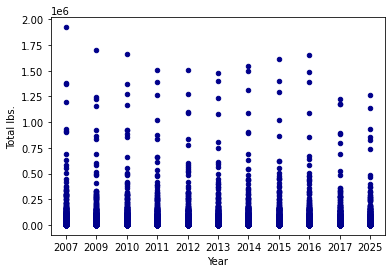

In [51]:
nitrogen_df.plot.scatter(x='Year',y='Total lbs.', c='DarkBlue')

In [52]:
phosphorus_df = pd.read_csv('Chesapeake_Bay_Pollution_Loads_-_Phosphorus.csv')
phosphorus_df = phosphorus_df.drop(['Land-River Segment', 'FIPS','Total P, 1985 (lb.)'], axis=1)
phosphorus_df.head()

,County,Tributary Basin,Major Basin,Source Sector,"Total P, 2007 (lb.)","Total P, 2009 (lb.)","Total P, 2010 (lb.)","Total P, 2011 (lb.)","Total P, 2012 (lb.)","Total P, 2013 (lb.)","Total P, 2014 (lb.)","Total P, 2015 (lb.)","Total P, 2016 (lb.)","Total P Target, 2017 (lb.)",Total P Target 2025 (lb.)
0,ALLEGANY,Upper Potomac,Potomac River Basin,Agriculture,661.012710,553.003926,521.461518,483.048014,421.831068,402.633925,959.502387,916.834613,871.962640,507.234019,476.720747
1,ALLEGANY,Upper Potomac,Potomac River Basin,Forest,2138.672523,2117.196495,2120.383041,2123.066192,2128.680687,2098.779388,2064.980438,2047.964321,2087.265579,2142.337322,2159.097873
2,ALLEGANY,Upper Potomac,Potomac River Basin,Non-Tidal Atm,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473,1.831473
3,ALLEGANY,Upper Potomac,Potomac River Basin,Septic,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ALLEGANY,Upper Potomac,Potomac River Basin,Stormwater,561.288327,558.587551,556.963596,554.123078,554.285650,1090.889577,589.161640,594.581849,597.081839,473.675711,417.067818


In [53]:
temp_dict = {}
#changes Total P, #### (lb.) -> ####
for column in phosphorus_df.columns[4:]:
    temp_dict[column] = re.findall("\d{4}", column)[0]


phosphorus_df = phosphorus_df.rename(columns=temp_dict)
phosphorus_df = pd.melt(phosphorus_df,id_vars=['County','Tributary Basin','Major Basin','Source Sector'], var_name='Year', value_name='Total lbs.')

<AxesSubplot:xlabel='Year', ylabel='Total lbs.'>

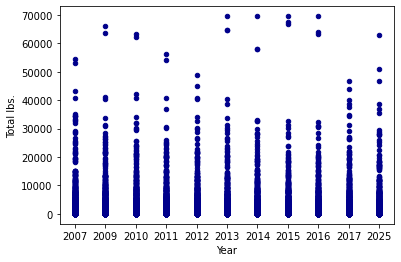

In [55]:
phosphorus_df.plot.scatter(x='Year',y='Total lbs.', c='DarkBlue')

In [5]:
algae_df = pd.read_csv('LivingResourcesReportedStation.csv', low_memory =False)
algae_df.LatinName.unique()

array(['Blue green sphere', 'Micro-phytoflagellates', 'Ebria tripartita',
       'Centrales', 'Skeletonema costatum', 'Cyclotella caspia',
       'Chaetoceros', 'Pennales', 'Navicula', 'Ankistrodesmus falcatus',
       'Pyrrophycophyta', 'Prorocentrum minimum', 'Amphidinium',
       'Gymnodinium', 'Katodinium rotundatum', 'Diplopsalis lenticula',
       'Heterocapsa triquetra', 'Protoperidinium', 'Ceratium furca',
       'Cryptomonas', 'Dactyliosolen fragilissimus',
       'Guinardia delicatula', 'Green cells', 'Chroococcus',
       'Paralia sulcata', 'Leptocylindrus danicus',
       'Leptocylindrus minimus', 'Thalassiosira', 'Coscinodiscus',
       'Eucampia zoodiacus', 'Cerataulina pelagica',
       'Chaetoceros decipiens', 'Chaetoceros pendulus',
       'Chaetoceros subtilis', 'Rhizosolenia setigera',
       'Ditylum brightwellii', 'Fragilaria',
       'Thalassionema nitzschioides', 'Pleurosigma',
       'Cylindrotheca closterium', 'Euglena', 'Polykrikos kofoidi',
       'Scrippsiel

In [66]:
prorocentrum_minimum = algae_df[algae_df['LatinName'] == 'Prorocentrum minimum'].copy(deep=True).reset_index()

,index,SurveyId,FieldActivityId,Source,SampleType,Station,SampleDate,Layer,SampleNumber,GMethod,TSN,LatinName,Size,Method,Parameter,ReportingValue,ReportingUnit,NODCCode,SPECCode,SerialNumber
0,14,453668,453668.0,ODU/PEL,C,CB6.1,12/13/2018,AP,FS1,7.0,9880.0,Prorocentrum minimum,Not Applicable,PH103,COUNT,1435008.0,L,1202010402,375.0,20181213CB6.1
1,61,453668,453668.0,ODU/PEL,C,CB6.1,12/13/2018,BP,FS1,7.0,9880.0,Prorocentrum minimum,Not Applicable,PH103,COUNT,459027.7,L,1202010402,375.0,20181213CB6.1
2,111,453756,453756.0,ODU/PEL,C,CB7.3E,12/13/2018,AP,FS1,7.0,9880.0,Prorocentrum minimum,Not Applicable,PH103,COUNT,2031744.0,L,1202010402,375.0,20181213CB7.3E
3,158,453756,453756.0,ODU/PEL,C,CB7.3E,12/13/2018,BP,FS1,7.0,9880.0,Prorocentrum minimum,Not Applicable,PH103,COUNT,291264.0,L,1202010402,375.0,20181213CB7.3E
4,204,453799,453799.0,ODU/PEL,C,CB7.4,12/13/2018,AP,FS1,7.0,9880.0,Prorocentrum minimum,Not Applicable,PH103,COUNT,866688.0,L,1202010402,375.0,20181213CB7.4


In [86]:
year = []
for date in prorocentrum_minimum.SampleDate:
    year.append(date[-2:])
prorocentrum_minimum['Year'] = year
prorocentrum_minimum

,index,SurveyId,FieldActivityId,Source,SampleType,Station,SampleDate,Layer,SampleNumber,GMethod,...,LatinName,Size,Method,Parameter,ReportingValue,ReportingUnit,NODCCode,SPECCode,SerialNumber,Year
0,14,453668,453668.0,ODU/PEL,C,CB6.1,12/13/2018,AP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH103,COUNT,1435008.0,L,1202010402,375.0,20181213CB6.1,18
1,61,453668,453668.0,ODU/PEL,C,CB6.1,12/13/2018,BP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH103,COUNT,459027.7,L,1202010402,375.0,20181213CB6.1,18
2,111,453756,453756.0,ODU/PEL,C,CB7.3E,12/13/2018,AP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH103,COUNT,2031744.0,L,1202010402,375.0,20181213CB7.3E,18
3,158,453756,453756.0,ODU/PEL,C,CB7.3E,12/13/2018,BP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH103,COUNT,291264.0,L,1202010402,375.0,20181213CB7.3E,18
4,204,453799,453799.0,ODU/PEL,C,CB7.4,12/13/2018,AP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH103,COUNT,866688.0,L,1202010402,375.0,20181213CB7.4,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,222338,165751,165751.0,ODU/PEL,C,SBE5,1/21/2000,BP,FS1,7.0,...,Prorocentrum minimum,Not Applicable,PH102,COUNT,1280.0,L,1202010402,375.0,200010137,00
3814,222360,165746,165746.0,MSU/PEARL,C,CB2.2,1/20/2000,WC,FS7,7.0,...,Prorocentrum minimum,Not Applicable,PH101,COUNT,98808.0,L,1202010402,375.0,273003,00
3815,222375,165739,165739.0,MSU/PEARL,C,CB3.3C,1/19/2000,AP,FS5,7.0,...,Prorocentrum minimum,Not Applicable,PH101,COUNT,1152760.0,L,1202010402,375.0,273007,00
3816,222395,165732,165732.0,MSU/PEARL,C,CB4.3C,1/19/2000,AP,FS5,7.0,...,Prorocentrum minimum,Not Applicable,PH101,COUNT,576380.0,L,1202010402,375.0,273016,00


<AxesSubplot:xlabel='Year', ylabel='ReportingValue'>

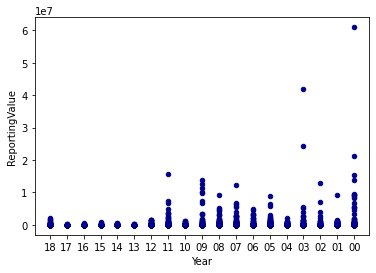

In [84]:
prorocentrum_minimum.plot.scatter(x='Year',y='ReportingValue', c='DarkBlue')